#*Reading and Displaying the UAV Asphalt Pavement Distress Dataset*
The dataset is obtained from https://github.com/tantantetetao/UAPD-Pavement-Distress-Dataset

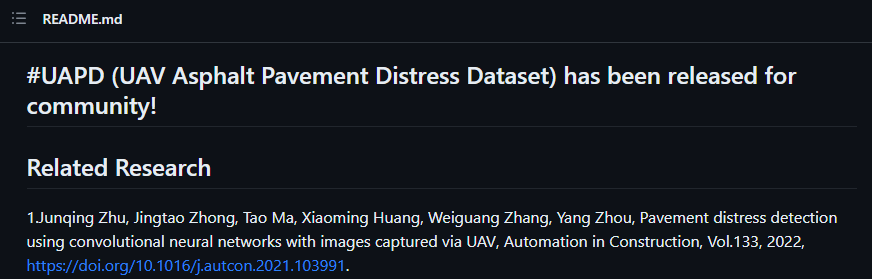

# Mount to Google Drive

In [2]:
from google.colab import drive
import os
drive.mount('/content/drive')
CurrentDir='/content/drive/My Drive/Pavement/ICTD/WorkshopCNN' #Change with your own path to the project!
os.chdir(CurrentDir)

Mounted at /content/drive


# Load Packages

In [23]:
import os
import numpy as np
from PIL import Image
import xml.etree.ElementTree as ET
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches

# Define functions to load and diplay images

In [21]:
def parse_xml(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    bounding_boxes = []
    labels = []

    for obj in root.findall('object'):
        label = obj.find('name').text
        if 'crack' in label:
          labels.append('Crack')
        else:
          labels.append(label)

        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)
        bounding_boxes.append((xmin, ymin, xmax, ymax))

    # Calculate the areas of the bounding boxes and get the index of the largest
    areas = [(xmax - xmin) * (ymax - ymin) for xmin, ymin, xmax, ymax in bounding_boxes]
    largest_bbox_index = areas.index(max(areas))
    
    return bounding_boxes[largest_bbox_index], labels[largest_bbox_index]

def show_image_with_boxes(image_path, bounding_boxes, labels):
    # Load image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(img)

    # Create a Rectangle patch for each bounding box and add it to the plot
    (xmin, ymin, xmax, ymax)=bboxes
    label=labels

    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.text(xmin, ymin, label, color='white', backgroundcolor='red')

    # Show the plot with the bounding boxes
    plt.show()

Read and display the bounding box as well as the label of distress

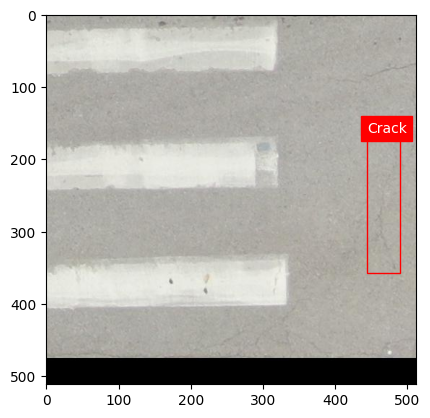

In [26]:
image_dir = 'data/img'
label_dir = 'data/label'
indexofimage=1 #0,1,2,3
# Get list of image filenames
image_filenames = []
for entry in os.scandir(image_dir):
    if entry.is_file() and entry.name.endswith(".JPG"):
        image_filenames.append(entry.name)
        if len(image_filenames) >= 10:  # Stop after finding 10 ".JPG" files
            break
filename = image_filenames[indexofimage]

# Assume the image and label files have the same base filename
img_path = os.path.join(image_dir, filename)
xml_path = os.path.join(label_dir, os.path.splitext(filename)[0] + '.xml')

if os.path.exists(xml_path):  # Check if corresponding XML file exists
    bboxes, lbls = parse_xml(xml_path)
    show_image_with_boxes(img_path, bboxes, lbls)

# Read the images and save as npy files
Only use this function if you would like to re-read and save data. There is a presaved version already available in the folder

In [ ]:
image_dir = 'data/img'
label_dir = 'data/label'

image_data = []
labels = []
bounding_boxes = []
c = 1
save_counter = 0
for filename in os.listdir(image_dir):
    try:
      if filename.endswith('.JPG'):  # Assuming images are in JPG format
          image_path = os.path.join(image_dir, filename)
          image = Image.open(image_path).resize((512, 512))  # Resize the image to 512x512
          
          label_filename = filename.replace('.JPG', '.xml')  # Assuming labels are in XML format with the same name as the images
          label_path = os.path.join(label_dir, label_filename)
          bbox, label = parse_xml(label_path)
          
          image_data.append(np.array(image))
          bounding_boxes.append(bbox)
          labels.append(label)

          print(f"Processing {c}th image")  # Printing each time in the loop
          c += 1

          save_counter += 1
          if save_counter % 200 == 0:  # Save every 200 steps
            np.save('data/npdata/archive/image_data.npy', np.array(image_data))
            np.save('data/npdata/archive/bounding_boxes.npy', np.array(bounding_boxes))
            np.save('data/npdata/archive/labels.npy', np.array(labels))
            print(f"Data saved after {save_counter} steps")  # Printing each time we save
    except:
      pass
np.save('data/npdata/archive/image_data.npy', np.array(image_data))
np.save('data/npdata/archive/bounding_boxes.npy', np.array(bounding_boxes))
np.save('data/npdata/archive/labels.npy', np.array(labels))